## 과제 1: 알고리즘 성능 비교  
Iris 데이터로 5가지 알고리즘 모두 실습  
→ 정확도 표로 정리 (LDA 제외)

- Logistic Regression
- Decision Tree
- Naive Bayes
- ~LDA~
- KNN

In [87]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [50]:
# 데이터 로드
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# LogisticRegression 모델 생성
logi = LogisticRegression(multi_class='ovr')

# Decision Tree 모델 생성
tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Naive Bayes 모델 생성
nb = GaussianNB()

# KNN 모델 생성
knn = KNeighborsClassifier(n_neighbors=3)

# LDA 모델 생성
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

In [63]:
# 모델 학습 및 정확도 출력
models = {
    'LogisticRegression': logi,
    'DecisionTree': tree,
    'NaiveBayes': nb,
    'KNN': knn
}

results = []

for name, model in models.items():

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)

    results.append({
        '모델' : name,
        '정확도' : f'{acc:.3f}'
    })

display(pd.DataFrame(results))

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,모델,정확도
0,LogisticRegression,0.967
1,DecisionTree,1.000
2,NaiveBayes,1.000
3,KNN,1.000


---
## 과제 2: Decision Tree 깊이 실험  
max_depth를 3~5까지 바꿔가며 성능 측정  
→ 그래프로 시각화

In [86]:
# Decision Tree 모델 생성
tree_models = {}

for depth in range(3, 6):
    tree = DecisionTreeClassifier(
        max_depth=depth,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )

    tree.fit(X_train, y_train)
    model_name = f"tree_{depth}"
    tree_models[model_name] = tree

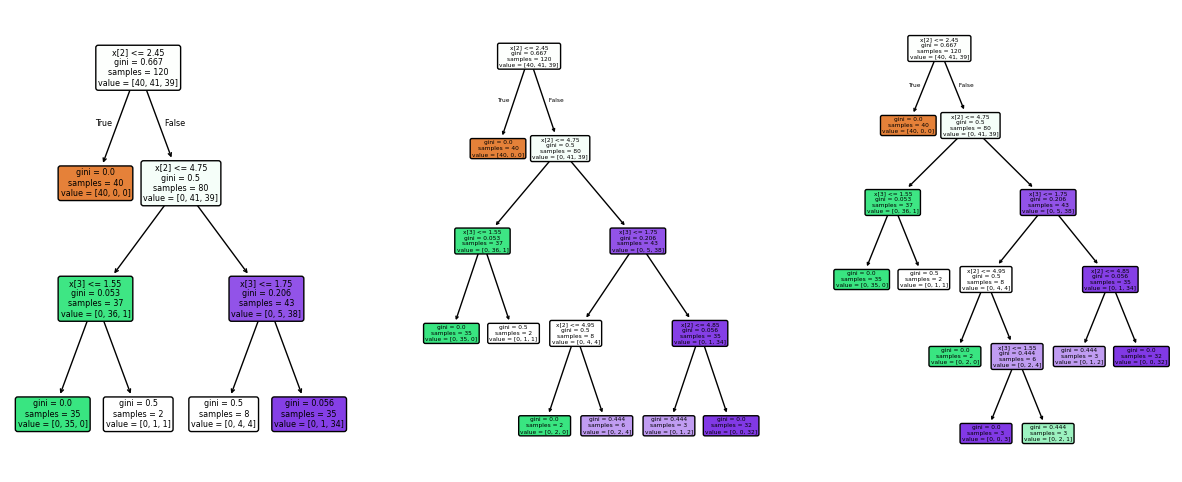

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(15,6))

plot_tree(tree_models['tree_3'], filled=True, rounded=True, ax=axs[0])
plot_tree(tree_models['tree_4'], filled=True, rounded=True, ax=axs[1])
plot_tree(tree_models['tree_5'], filled=True, rounded=True, ax=axs[2])

plt.show()


---
## 과제 3: KNN 하이퍼파라미터 튜닝  
K값과 거리 측정 방법을 바꿔가며 실험  
→ 최적 조합 찾기

In [117]:
scores = []
metrics = ['euclidean', 'manhattan', 'minkowski']

for k in range(1, 31):
    for m in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        score = cross_val_score(knn, X_train, y_train, scoring='accuracy').mean()
        scores.append({
            'k' : k,
            'metric' : m,
            'score' : score
        })

best_result = max(scores, key=lambda x: x['score'])

print('가장 높은 score 데이터')
print(f'k : {best_result['k']}')
print(f'metric : {best_result['metric']}')
print(f'score : {best_result['score']:.4f}')

가장 높은 score 데이터
k : 14
metric : manhattan
score : 0.9667
